In [73]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from datasets import DatasetDict, concatenate_datasets

mod_tax = 10
mod_order = 5
train_size = 0.7
test_size = 0.2 
val_size = 0.1


## create Dataset

In [30]:
dataset = load_dataset("/home/sebastian/Documents/Hauptprojekt/Daten_sorted")

Resolving data files:   0%|          | 0/107394 [00:00<?, ?it/s]

In [31]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 107394
    })
})

In [32]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}


train_datasets, test_datasets = [], []

In [33]:
def check_label(examples, label_index):
    booleans = []
    for label in examples['label']:
        try:
            if label == label_index:
                booleans.append(True)
            else:
                booleans.append(False)
        except:
            booleans.append(False)

    return booleans

# for each class: filter the dataset on documents with that class
# and then use the first 10 for training, and the last 10 for testing
for id in id2label.keys():
    # filter dataset on particular label
    filtered_dataset = dataset.filter(check_label, fn_kwargs={'label_index':id}, batched=True)
    
    if id == 2:
        mod5len = int(filtered_dataset["train"].num_rows*(1/mod_order))            
        mod5trainlen = int(mod5len*train_size)
        filted_train_dataset = filtered_dataset["train"].select(range(mod5trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(mod5trainlen, int(mod5len*0.9)))
        test_datasets.append(filted_test_dataset)
        print(mod5trainlen)
                      
    elif id == 7:
        mod10len = int(filtered_dataset["train"].num_rows*(1/mod_tax))
        mod10trainlen = int(mod10len*train_size)
        filted_train_dataset = filtered_dataset["train"].select(range(mod10trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(mod10trainlen, int(mod10len*0.9)))
        test_datasets.append(filted_test_dataset)
        print(mod10trainlen)
    else:    
        trainlen = int(filtered_dataset["train"].num_rows*train_size)
        totallen = int(filtered_dataset["train"].num_rows)
        # select first 10 examples for training
        filted_train_dataset = filtered_dataset["train"].select(range(trainlen))
        train_datasets.append(filted_train_dataset)
        # select last 10 examples for testing
        filted_test_dataset = filtered_dataset["train"].select(range(trainlen, int(totallen*0.9)))
        test_datasets.append(filted_test_dataset)
        print(trainlen)

24
4
3924
23
2217
784
1485
5099
12


In [35]:
train_datasets

[Dataset({
     features: ['image', 'label'],
     num_rows: 24
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 4
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 3924
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 23
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 2217
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 784
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 1485
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 5099
 }),
 Dataset({
     features: ['image', 'label'],
     num_rows: 12
 })]

In [36]:
toy_dataset = DatasetDict({"train": concatenate_datasets(train_datasets),
                           "test": concatenate_datasets(test_datasets)
                           })

In [39]:
toy_dataset["train"][10000]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1875x2339>,
 'label': 7}

In [40]:
# note that, in case you use the private hub, you can just add `private=True`
toy_dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_10_5", private=True)

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/8 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1697 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1696 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/17 [00:00<?, ?ba/s]

Map:   0%|          | 0/1940 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

In [41]:
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_10_5")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/3879 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/13572 [00:00<?, ? examples/s]

In [42]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 3879
    })
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 13572
    })
})

## Prepare Donut format

In [43]:
template = '{"gt_parse": {"class" : '

In [44]:
id2label = {
  0: "credit_note",
  1: "debit_note",
  2: "order",
  3: "proforma",
  4: "purchase_order",
  5: "receipt",
  6: "sales_order",
  7: "tax_invoice",
  8: "utility_bill"
}


def update_examples(examples):
    ground_truths = []
    for label in examples['label']:
        ground_truths.append(template + '"' + id2label[label] + '"' + "}}")

    examples['ground_truth'] = ground_truths

    return examples

dataset = dataset.map(update_examples, batched=True)
     

Map:   0%|          | 0/3879 [00:00<?, ? examples/s]

Map:   0%|          | 0/13572 [00:00<?, ? examples/s]

In [47]:
test = dataset['train'][5000]['ground_truth']
test

'{"gt_parse": {"class" : "purchase_order"}}'

In [48]:
from ast import literal_eval

test2 = literal_eval(test)
test2['gt_parse']

{'class': 'purchase_order'}

In [49]:
dataset

DatasetDict({
    test: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 3879
    })
    train: Dataset({
        features: ['image', 'label', 'ground_truth'],
        num_rows: 13572
    })
})

In [50]:
dataset.push_to_hub("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", private=True)

Map:   0%|          | 0/1940 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/7 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1939 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Map:   0%|          | 0/1938 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

## Load dataset

In [2]:
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5")

In [3]:
id2label = {id: label for id, label in enumerate(dataset['train'].features['label'].names)}
print(id2label)

{0: 'credit_note', 1: 'debit_note', 2: 'order', 3: 'proforma', 4: 'purchase_order', 5: 'receipt', 6: 'sales_order', 7: 'tax_invoice', 8: 'utility_bill'}


In [4]:
example = dataset["train"][0]
example["ground_truth"]

'{"gt_parse": {"class" : "credit_note"}}'

In [5]:
from ast import literal_eval

literal_eval(example["ground_truth"])['gt_parse']

{'class': 'credit_note'}

In [6]:
from transformers import VisionEncoderDecoderConfig

max_length = 8
#image_size = [1920, 1080]
# let's use a smaller image size (height, width) because otherwise OOM
# the higher the resolution, the better the results will be
# so if you have a big GPU, feel free to increase
image_size = [1280, 960]

# update image_size of the encoder
# during pre-training, a larger image size was used
config = VisionEncoderDecoderConfig.from_pretrained("nielsr/donut-base")
config.encoder.image_size = image_size # (height, width)
# update max_length of the decoder (for generation)
config.decoder.max_length = max_length
# TODO we should actually update max_position_embeddings and interpolate the pre-trained ones:
# https://github.com/clovaai/donut/blob/0acc65a85d140852b8d9928565f0f6b2d98dc088/donut/model.py#L602

In [7]:
from transformers import DonutProcessor, VisionEncoderDecoderModel, BartConfig

processor = DonutProcessor.from_pretrained("nielsr/donut-base")
model = VisionEncoderDecoderModel.from_pretrained("nielsr/donut-base", config=config)

2023-09-07 17:00:53.553626: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-07 17:00:53.587885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 17:00:54.155930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [8]:
# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# source: https://github.com/clovaai/donut/blob/master/config/train_cord.yaml
processor.feature_extractor.size = image_size[::-1] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/models/donut/processing_donut.py:189: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


In [9]:
len(processor.tokenizer)

57525

In [10]:
from typing import List

def add_tokens(list_of_tokens: List[str]):
    """
    Add tokens to tokenizer and resize the token embeddings
    """
    newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
    if newly_added_num > 0:
        model.decoder.resize_token_embeddings(len(processor.tokenizer))

In [11]:
additional_tokens = ["<credit_note/>", "<debit_note/>", "<order/>", "<proforma/>", "<purchase_order/>", 
                     "<receipt/>", "<sales_order/>", "<tax_invoice/>", "<utility_bill/>"]


add_tokens(additional_tokens)

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57534. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [12]:
processor.tokenizer.convert_tokens_to_ids(["<order/>"])

[57527]

In [13]:
len(processor.tokenizer)

57534

In [14]:
import json
import random
from typing import Any, List, Tuple

import torch
from torch.utils.data import Dataset

class DonutDataset(Dataset):
    """
    DonutDataset which is saved in huggingface datasets format. (see details in https://huggingface.co/docs/datasets)
    Each row, consists of image path(png/jpg/jpeg) and gt data (json/jsonl/txt),
    and it will be converted into input_tensor(vectorized image) and input_ids(tokenized string).
    Args:
        dataset_name_or_path: name of dataset (available at huggingface.co/datasets) or the path containing image files and metadata.jsonl
        max_length: the max number of tokens for the target sequences
        split: whether to load "train", "validation" or "test" split
        ignore_id: ignore_index for torch.nn.CrossEntropyLoss
        task_start_token: the special token to be fed to the decoder to conduct the target task
        prompt_end_token: the special token at the end of the sequences
        sort_json_key: whether or not to sort the JSON keys
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        max_length: int,
        split: str = "train",
        ignore_id: int = -100,
        task_start_token: str = "<s>",
        prompt_end_token: str = None,
        sort_json_key: bool = True,
    ):
        super().__init__()

        self.max_length = max_length
        self.split = split
        self.ignore_id = ignore_id
        self.task_start_token = task_start_token
        self.prompt_end_token = prompt_end_token if prompt_end_token else task_start_token
        self.sort_json_key = sort_json_key

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.gt_token_sequences = []
        for sample in self.dataset:
            ground_truth = json.loads(sample["ground_truth"])
            if "gt_parses" in ground_truth:  # when multiple ground truths are available, e.g., docvqa
                assert isinstance(ground_truth["gt_parses"], list)
                gt_jsons = ground_truth["gt_parses"]
            else:
                assert "gt_parse" in ground_truth and isinstance(ground_truth["gt_parse"], dict)
                gt_jsons = [ground_truth["gt_parse"]]

            self.gt_token_sequences.append(
                [
                    self.json2token(
                        gt_json,
                        update_special_tokens_for_json_key=self.split == "train",
                        sort_json_key=self.sort_json_key,
                    )
                    + processor.tokenizer.eos_token
                    for gt_json in gt_jsons  # load json from list of json
                ]
            )

        self.add_tokens([self.task_start_token, self.prompt_end_token])
        self.prompt_end_token_id = processor.tokenizer.convert_tokens_to_ids(self.prompt_end_token)

    def json2token(self, obj: Any, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
        """
        Convert an ordered JSON object into a token sequence
        """
        if type(obj) == dict:
            if len(obj) == 1 and "text_sequence" in obj:
                return obj["text_sequence"]
            else:
                output = ""
                if sort_json_key:
                    keys = sorted(obj.keys(), reverse=True)
                else:
                    keys = obj.keys()
                for k in keys:
                    if update_special_tokens_for_json_key:
                        self.add_tokens([fr"<s_{k}>", fr"</s_{k}>"])
                    output += (
                        fr"<s_{k}>"
                        + self.json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                        + fr"</s_{k}>"
                    )
                return output
        elif type(obj) == list:
            return r"<sep/>".join(
                [self.json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
            )
        else:
            obj = str(obj)
            if f"<{obj}/>" in additional_tokens:
                obj = f"<{obj}/>"  # for categorical special tokens
            return obj
    
    def add_tokens(self, list_of_tokens: List[str]):
        """
        Add tokens to tokenizer and resize the token embeddings of the decoder
        """
        newly_added_num = processor.tokenizer.add_tokens(list_of_tokens)
        if newly_added_num > 0:
            model.decoder.resize_token_embeddings(len(processor.tokenizer))
    
    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        """
        Load image from image_path of given dataset_path and convert into input_tensor and labels
        Convert gt data into input_ids (tokenized string)
        Returns:
            input_tensor : preprocessed image
            input_ids : tokenized gt_data
            labels : masked labels (model doesn't need to predict prompt and pad token)
        """
        sample = self.dataset[idx]

        # pixel values (we remove the batch dimension)
        pixel_values = processor(sample["image"].convert("RGB"), random_padding=self.split == "train", return_tensors="pt").pixel_values
        pixel_values = pixel_values.squeeze()

        # labels, which are the input ids of the target sequence
        target_sequence = random.choice(self.gt_token_sequences[idx])  # can be more than one, e.g., DocVQA Task 1
        input_ids = processor.tokenizer(
            target_sequence,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )["input_ids"].squeeze(0)

        labels = input_ids.clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.ignore_id  # model doesn't need to predict pad token
        # labels[: torch.nonzero(labels == self.prompt_end_token_id).sum() + 1] = self.ignore_id  # model doesn't need to predict prompt (for VQA)
        
        encoding = dict(pixel_values=pixel_values,
                        labels=labels)
        
        return encoding

In [15]:
dataset["train"]

Dataset({
    features: ['image', 'label', 'ground_truth'],
    num_rows: 13572
})

In [16]:
train_dataset = DonutDataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", max_length=max_length,
                             split="train", task_start_token="<s_docile>", prompt_end_token="<s_docile>",
                             sort_json_key=False, # rvlcdip dataset is preprocessed, so no need for this
                             )

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57536. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embeding dimension will be 57537. This might induce some performance reduction as *Tensor Cores* will not be available. For more details  about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [17]:
train_dataset[0]

{'pixel_values': tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],
 
         [[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]]),
 'labels': tensor([57534, 57525, 57535,     2,  -100,  -100,  -100

## Create Dataloader

In [18]:
from torch.utils.data import DataLoader

# using batch_size > 3 gives Cuda out of Memory error
train_dataloader = DataLoader(train_dataset, batch_size=3, shuffle=True)

In [19]:
batch = next(iter(train_dataloader))
print(batch.keys())

dict_keys(['pixel_values', 'labels'])


In [20]:
for id in batch['labels'][0].tolist():
    if id != -100:
        print(processor.decode([id]))
    else:
        print(id)

<s_class>
<purchase_order/>
</s_class>
</s>
-100
-100
-100
-100


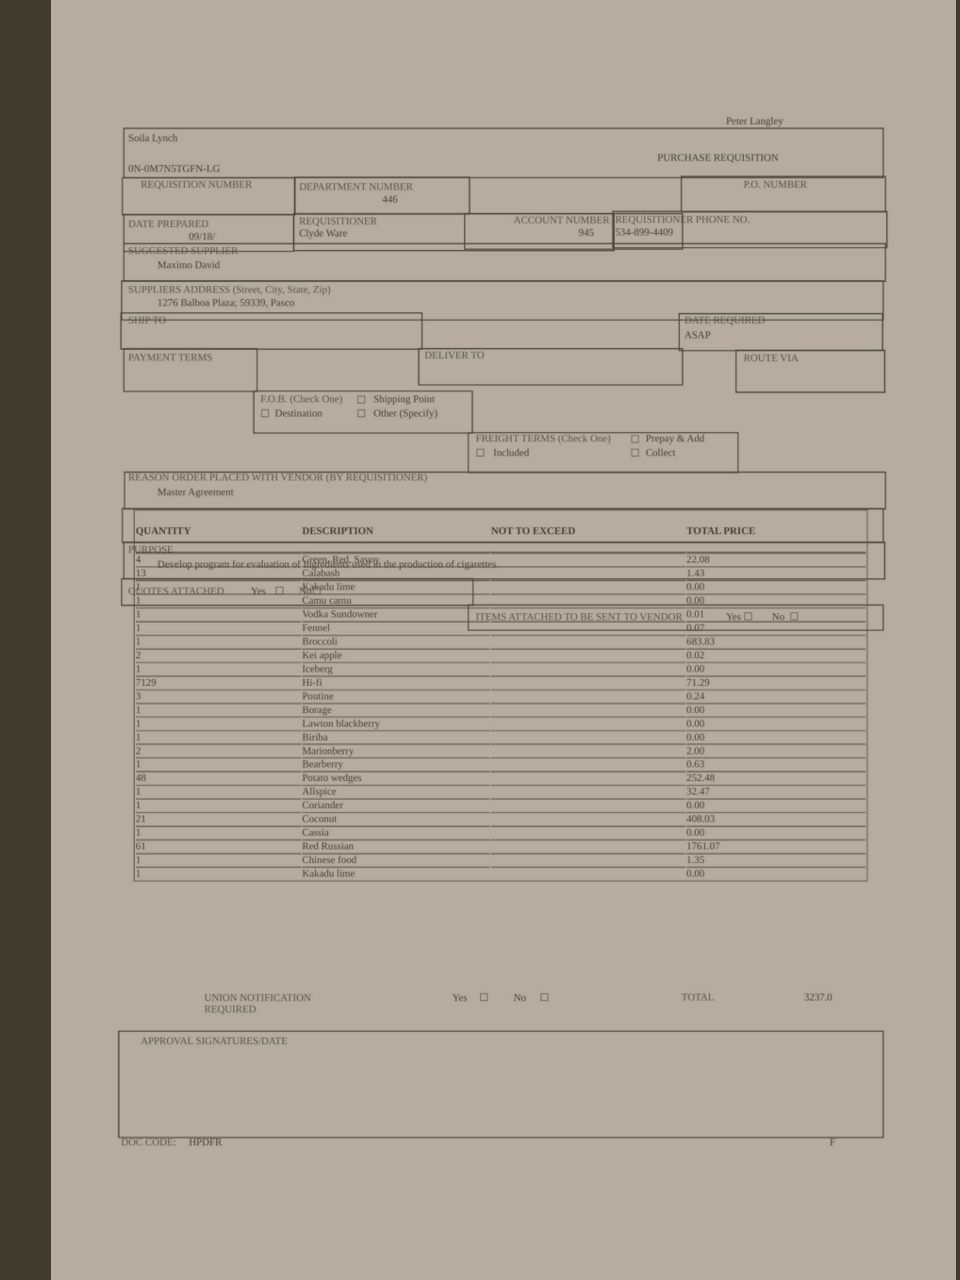

In [21]:
from PIL import Image
import numpy as np

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

# unnormalize
reconstructed_image = (batch['pixel_values'][0] * torch.tensor(std)[:, None, None]) + torch.tensor(mean)[:, None, None]
# unrescale
reconstructed_image = reconstructed_image * 255
# convert to numpy of shape HWC
reconstructed_image = torch.moveaxis(reconstructed_image, 0, -1)
image = Image.fromarray(reconstructed_image.numpy().astype(np.uint8))
image

## Train the model 

In [22]:
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s_docile>'])[0]

In [23]:
# sanity check
print("Pad token ID:", processor.decode([model.config.pad_token_id]))
print("Decoder start token ID:", processor.decode([model.config.decoder_start_token_id]))

Pad token ID: <pad>
Decoder start token ID: <s_docile>


In [24]:
import torch
from tqdm.auto import tqdm

epochs = 30

device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)

for epoch in range(epochs):
    print("Epoch:", epoch+1)  
    model.train()
    for i, batch in enumerate(tqdm(train_dataloader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]
        #print(pixel_values)
        #print(labels)
        outputs = model(pixel_values=pixel_values,
                        labels=labels)
        
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i % 500 == 0:
            print("Loss:", loss.item())
    if (epoch+1) % 10 == 0:
        model.push_to_hub("ZaNioxX/DocILE_" + str(epochs) + "_10_5_ImageClassification_donut_" + str(epoch+1) + "epochs", private=True)

Epoch: 1


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 19.784040451049805
Loss: 0.3865649998188019
Loss: 0.15679466724395752
Loss: 0.01495132502168417
Loss: 0.03669462352991104
Loss: 0.030659524723887444
Loss: 0.20192193984985352
Loss: 0.01531859952956438
Loss: 0.23996537923812866
Loss: 0.00014061019464861602
Epoch: 2


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.000469257211079821
Loss: 0.015796830877661705
Loss: 0.0005353260785341263
Loss: 0.03046647645533085
Loss: 0.0006791202467866242
Loss: 0.006198170129209757
Loss: 0.00042495105299167335
Loss: 0.0549306720495224
Loss: 0.0025321629364043474
Loss: 0.01354309543967247
Epoch: 3


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.008798710070550442
Loss: 0.0045782639645040035
Loss: 0.004889278672635555
Loss: 0.00021582927729468793
Loss: 0.0005164372269064188
Loss: 0.0400007925927639
Loss: 0.00032520914101041853
Loss: 0.00454501761123538
Loss: 0.00019566224364098161
Loss: 0.010800093412399292
Epoch: 4


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.023571325466036797
Loss: 0.0031393796671181917
Loss: 0.0005610663793049753
Loss: 0.0007103855605237186
Loss: 0.00019888738461304456
Loss: 0.0004265375609975308
Loss: 0.000984938582405448
Loss: 0.042815789580345154
Loss: 0.0002944682782981545
Loss: 0.002562932902947068
Epoch: 5


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 1.8864277080865577e-05
Loss: 0.0022232448682188988
Loss: 7.228791218949482e-05
Loss: 0.000600347004365176
Loss: 0.053012337535619736
Loss: 0.0006191583815962076
Loss: 0.0003341783594805747
Loss: 0.01127838809043169
Loss: 0.00021061782899778336
Loss: 9.604472870705649e-05
Epoch: 6


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 5.849860099260695e-05
Loss: 4.173623165115714e-05
Loss: 1.3162177310732659e-05
Loss: 0.00047126770368777215
Loss: 1.2565785254992079e-05
Loss: 9.774701538844965e-06
Loss: 6.004274473525584e-05
Loss: 0.001031345222145319
Loss: 0.0011780114145949483
Loss: 0.0027414746582508087
Epoch: 7


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0005719473701901734
Loss: 2.5894478312693536e-05
Loss: 0.000574991456232965
Loss: 0.00013533227320294827
Loss: 0.00022109872952569276
Loss: 5.324748417478986e-05
Loss: 1.270492430194281e-05
Loss: 0.0001835373550420627
Loss: 3.9165850466815755e-05
Loss: 3.933872903871816e-06
Epoch: 8


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0013676122762262821
Loss: 7.999991066753864e-05
Loss: 0.002089562825858593
Loss: 9.347827290184796e-05
Loss: 0.010156151838600636
Loss: 5.304767455527326e-06
Loss: 0.0037592414300888777
Loss: 0.0021923703607171774
Loss: 4.649063612305326e-06
Loss: 0.3124006688594818
Epoch: 9


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.08738922327756882
Loss: 1.2138822057750076e-05
Loss: 0.017093388363718987
Loss: 5.193742617848329e-05
Loss: 0.0009937338763847947
Loss: 6.427220796467736e-05
Loss: 0.0033318146597594023
Loss: 7.40394534659572e-05
Loss: 0.0007805262575857341
Loss: 5.582873200182803e-06
Epoch: 10


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.00016244039579760283
Loss: 2.8091162675991654e-05
Loss: 4.993458787794225e-05
Loss: 0.004348997958004475
Loss: 0.002501668408513069
Loss: 9.57852098508738e-05
Loss: 1.4642052519775461e-05
Loss: 0.00033870269544422626
Loss: 1.943979805218987e-05
Loss: 8.50340165925445e-06


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Epoch: 11


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 2.9381708372966386e-05
Loss: 0.011678793467581272
Loss: 7.847933716220723e-07
Loss: 0.0005888274754397571
Loss: 1.2327333934081253e-05
Loss: 0.010634060017764568
Loss: 5.761599823017605e-06
Loss: 1.1990057828370482e-05
Loss: 4.202023319521686e-06
Loss: 0.010417528450489044
Epoch: 12


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0017245534108951688
Loss: 2.355116157559678e-05
Loss: 0.0016301764408126473
Loss: 0.0005820813239552081
Loss: 3.508093868731521e-05
Loss: 0.003564274637028575
Loss: 1.347964189335471e-05
Loss: 1.4085727343626786e-05
Loss: 1.8803195416694507e-05
Loss: 3.902240496245213e-05
Epoch: 13


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 9.168183896690607e-05
Loss: 0.0023673877585679293
Loss: 5.76176773847692e-07
Loss: 1.6816773495520465e-05
Loss: 8.393973075726535e-06
Loss: 0.013841572217643261
Loss: 0.0008627381175756454
Loss: 1.2466451153159142e-05
Loss: 0.002251107944175601
Loss: 1.291429839511693e-06
Epoch: 14


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0002503448922652751
Loss: 0.00023973251518327743
Loss: 0.07529481500387192
Loss: 6.424894672818482e-05
Loss: 5.908268576604314e-05
Loss: 0.004035739693790674
Loss: 1.2814899719160167e-06
Loss: 0.00023129033797886223
Loss: 0.002136909170076251
Loss: 1.5596425555486348e-06
Epoch: 15


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 1.4383388588612434e-05
Loss: 0.03029724396765232
Loss: 2.484294236637652e-05
Loss: 1.1324851811878034e-06
Loss: 0.003212511306628585
Loss: 1.6747242625569925e-05
Loss: 5.542542567127384e-05
Loss: 1.0867513083212543e-05
Loss: 8.463538688374683e-05
Loss: 8.916206570575014e-05
Epoch: 16


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 1.432393128197873e-05
Loss: 0.0001548834698041901
Loss: 0.001511695678345859
Loss: 0.00018434943922329694
Loss: 0.0035196461249142885
Loss: 0.00016374967526644468
Loss: 5.1457386689435225e-06
Loss: 1.556553615955636e-05
Loss: 0.00012157682795077562
Loss: 0.0008346392423845828
Epoch: 17


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0002545981260482222
Loss: 1.9756642359425314e-05
Loss: 7.311255558306584e-06
Loss: 7.311460649361834e-05
Loss: 0.002133650006726384
Loss: 2.7405365472077392e-05
Loss: 0.1424170285463333
Loss: 1.1920897122763563e-06
Loss: 7.797921171004418e-06
Loss: 0.00043607057887129486
Epoch: 18


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 3.367624913153122e-06
Loss: 7.758901483612135e-05
Loss: 1.4920362445991486e-05
Loss: 0.0003914667759090662
Loss: 0.005888509098440409
Loss: 0.03632199391722679
Loss: 8.443961974080594e-07
Loss: 5.25497853232082e-06
Loss: 1.4603068620999693e-06
Loss: 0.000175095337908715
Epoch: 19


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0006970269023440778
Loss: 3.5160814150003716e-05
Loss: 4.082854502485134e-06
Loss: 2.660068821569439e-05
Loss: 8.840926966513507e-06
Loss: 3.90222885471303e-05
Loss: 5.761773422818806e-07
Loss: 5.364411777009082e-07
Loss: 6.45715942937386e-07
Loss: 3.3779182558646426e-05
Epoch: 20


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.00015481634181924164
Loss: 2.9300490496098064e-05
Loss: 0.0020119701512157917
Loss: 9.053544636117294e-05
Loss: 5.960454814157856e-07
Loss: 2.354352773181745e-06
Loss: 2.721918463066686e-06
Loss: 0.022488532587885857
Loss: 0.0008369129500351846
Loss: 0.00012776683433912694


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

Epoch: 21


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 1.649053956498392e-06
Loss: 0.00036528307828120887
Loss: 1.8179284779762384e-06
Loss: 0.00021015915262978524
Loss: 3.097945227636956e-05
Loss: 4.967052191773291e-08
Loss: 5.165654783922946e-06
Loss: 7.807851943653077e-06
Loss: 6.755165600225155e-07
Loss: 2.38401389651699e-05
Epoch: 22


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0008125805761665106
Loss: 0.007526543457061052
Loss: 2.462520933477208e-05
Loss: 5.265064260129293e-07
Loss: 1.788138632718983e-07
Loss: 4.728541625809157e-06
Loss: 5.761771149082051e-07
Loss: 0.00033456136588938534
Loss: 2.2677879314869642e-05
Loss: 1.0221575394098181e-05
Epoch: 23


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.0003769746981561184
Loss: 0.00018738974176812917
Loss: 3.1789087984179787e-07
Loss: 0.03269809111952782
Loss: 6.457157724071294e-07
Loss: 0.42712727189064026
Loss: 0.00013199899694882333
Loss: 2.682207025372918e-07
Loss: 8.841329304232204e-07
Loss: 5.165726975064899e-07
Epoch: 24


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 1.5684492609580047e-05
Loss: 0.00010465085506439209
Loss: 1.9470624010864412e-06
Loss: 2.930517212007544e-06
Loss: 2.1763500626548193e-05
Loss: 3.453538010944612e-05
Loss: 0.0013954071328043938
Loss: 0.00026306768995709717
Loss: 0.001937959692440927
Loss: 2.058220525213983e-05
Epoch: 25


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 7.053202466522634e-07
Loss: 6.953873565862523e-08
Loss: 9.834743650571909e-07
Loss: 1.9868211964535476e-08
Loss: 2.870529169740621e-05
Loss: 5.364401545193687e-07
Loss: 5.165721290723013e-07
Loss: 1.9868200240580336e-07
Loss: 1.7285175317738322e-06
Loss: 5.533114290301455e-06
Epoch: 26


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.28644877672195435
Loss: 0.0011902798432856798
Loss: 0.0036705259699374437
Loss: 3.675615687370737e-07
Loss: 6.896585546201095e-05
Loss: 3.25389628414996e-05
Loss: 6.457156018768728e-07
Loss: 8.791221262072213e-06
Loss: 3.079519274251652e-06
Loss: 1.599375991645502e-06
Epoch: 27


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 1.7035252312780358e-05
Loss: 5.076251454738667e-06
Loss: 2.6523650831222767e-06
Loss: 0.0
Loss: 3.178911072154733e-07
Loss: 5.731863438995788e-06
Loss: 3.804710331678507e-06
Loss: 1.4603093632103992e-06
Loss: 0.00027716674958355725
Loss: 1.9570036329241702e-06
Epoch: 28


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 0.00011735928273992613
Loss: 2.483491471139132e-06
Loss: 4.579552751238225e-06
Loss: 3.476931453860743e-07
Loss: 4.241827809892129e-06
Loss: 2.4636401576572098e-06
Loss: 2.751707825154881e-06
Loss: 2.18550212593982e-07
Loss: 7.351231374741474e-07
Loss: 4.08287814934738e-06
Epoch: 29


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 2.9106656711519463e-06
Loss: 2.3742252324154833e-06
Loss: 5.960450835118536e-07
Loss: 6.258478606468998e-07
Loss: 1.4901154088420299e-07
Loss: 1.0331430075893877e-06
Loss: 2.5828668981375813e-07
Loss: 2.6233159587718546e-05
Loss: 9.8046775747207e-06
Loss: 6.953862339287298e-07
Epoch: 30


  0%|          | 0/4524 [00:00<?, ?it/s]

Loss: 3.973642037635727e-08
Loss: 8.940648967836751e-07
Loss: 1.7086513253161684e-06
Loss: 3.973642037635727e-08
Loss: 2.8013721475872444e-06
Loss: 2.2848432479349867e-07
Loss: 7.396637374768034e-05
Loss: 8.176752453437075e-05
Loss: 8.940693163594915e-08
Loss: 1.5894439684416284e-06


pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

In [88]:
print(device)

cuda


## evaluate

In [111]:
import re
model  = VisionEncoderDecoderModel.from_pretrained("ZaNioxX/DocILE_30_10_5_ImageClassification_donut_20epochs")
model.to(device)
model.eval()

epochs = 20
dataset = load_dataset("ZaNioxX/DocILE_10_5_ImageClassification_donut_10_5", split="test")

output_list = []
real = []
accs = []
for idx, sample in tqdm(enumerate(dataset), total=len(dataset)):
    # prepare encoder inputs
    pixel_values = processor(sample["image"].convert("RGB"), return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    # prepare decoder inputs
    task_prompt = "<s_docile>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids
    decoder_input_ids = decoder_input_ids.to(device)
    
    # autoregressively generate sequence
    outputs = model.generate(
            pixel_values,
            decoder_input_ids=decoder_input_ids,
            max_length=model.decoder.config.max_position_embeddings,
            early_stopping=True,
            pad_token_id=processor.tokenizer.pad_token_id,
            eos_token_id=processor.tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            bad_words_ids=[[processor.tokenizer.unk_token_id]],
            return_dict_in_generate=True,
        )

    # turn into JSON
    seq = processor.batch_decode(outputs.sequences)[0]
    seq = seq.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    seq = re.sub(r"<.*?>", "", seq, count=1).strip()  # remove first task start token
    seq = processor.token2json(seq)

    ground_truth = json.loads(sample["ground_truth"])
    gt = ground_truth["gt_parse"]
    score = float(seq["class"] == gt["class"])

    accs.append(score)
    real.append(gt["class"])
    output_list.append(seq["class"])

scores = {"accuracies": accs, "mean_accuracy": np.mean(accs)}
print(scores, f"length : {len(accs)}")

  0%|          | 0/3879 [00:00<?, ?it/s]

/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/utils.py:1411: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/home/sebastian/anaconda3/envs/pt/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:399: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


{'accuracies': [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [105]:
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutClassification/" + str(epochs) + "epochs_y_pred.npy", output_list)
np.save("/home/sebastian/Documents/Hauptprojekt/Arrays/DonutClassification/" + str(epochs) + "epochs_y_real.npy", real)


## create plots

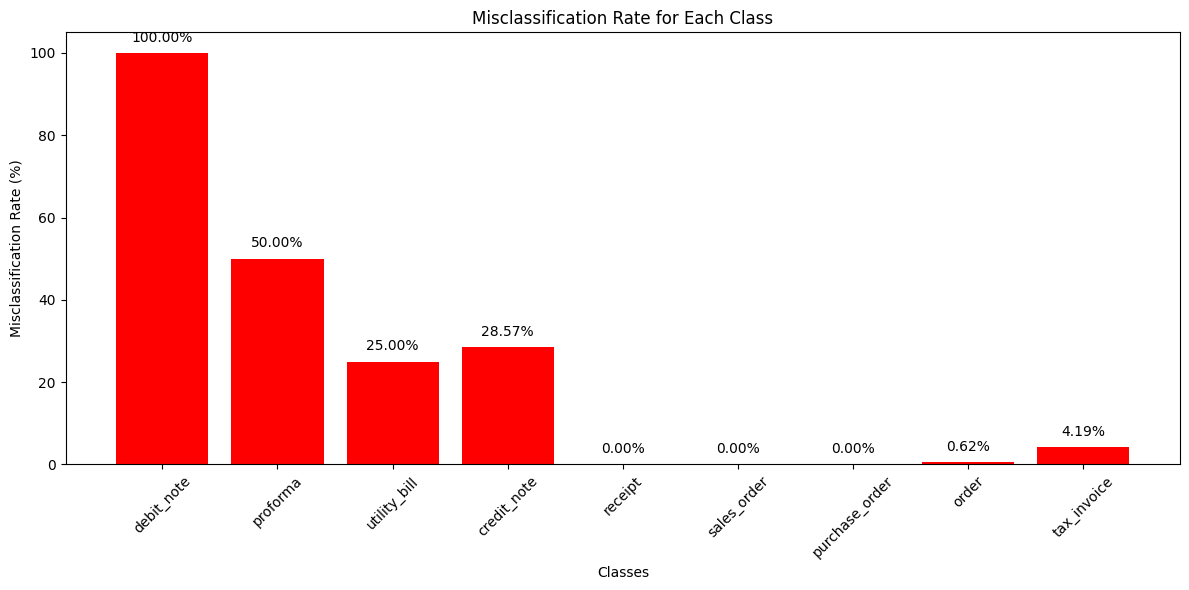

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Define the custom order for labels
custom_order = [
    "debit_note",
    "proforma",
    "utility_bill",
    "credit_note",
    "receipt",
    "sales_order",
    "purchase_order",
    "order",
    "tax_invoice"
]

# Create a dictionary to store the counts of each label
label_counts = {label: real.count(label) for label in set(real)}

# Initialize a dictionary to store the count of correct predictions for each label
correct_counts = {label: 0 for label in set(real)}

# Count the correct predictions for each label
for r, o in zip(real, output_list):
    if r == o:
        correct_counts[r] += 1

# Calculate the misclassification rate (percentage of wrong classifications) for each label
misclassification_per_label = {label: (1 - (correct_counts[label] / label_counts[label])) * 100 if label_counts[label] > 0 else 0 for label in custom_order}

# Create a list of labels and corresponding misclassification percentages
labels = [label for label in custom_order]
misclassification_values = [misclassification_per_label[label] for label in custom_order]

# Create a bar plot with custom ordering
plt.figure(figsize=(12, 6))
plt.bar(labels, misclassification_values, color='red')
plt.xlabel('Classes')
plt.ylabel('Misclassification Rate (%)')
plt.title('Misclassification Rate for Each Class')
plt.xticks(rotation=45)

# Display the misclassification percentage above each bar, with adjusted vertical alignment
for i, misclassification in enumerate(misclassification_values):
    plt.text(i, misclassification + 2, f'{misclassification:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/Classification_2' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()

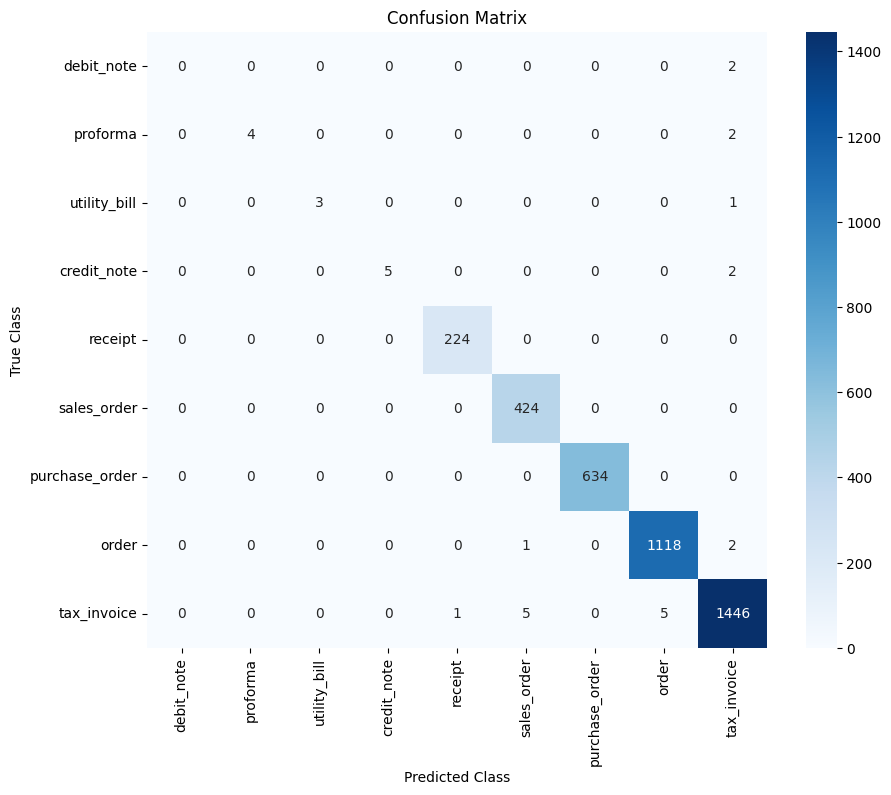

In [101]:
### from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Define the label mapping
label_mapping = {'debit_note': 0, 'proforma': 1, 'utility_bill': 2, 'credit_note': 3, 'receipt': 4, 'sales_order': 5, 'purchase_order': 6, 'order': 7, 'tax_invoice': 8}

# Map labels to integers
real_int = [label_mapping[label] for label in real]
output_int = [label_mapping[label] for label in output_list]

# Create the confusion matrix
conf_matrix = confusion_matrix(real_int, output_int)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=list(label_mapping.keys()), columns=list(label_mapping.keys()))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()


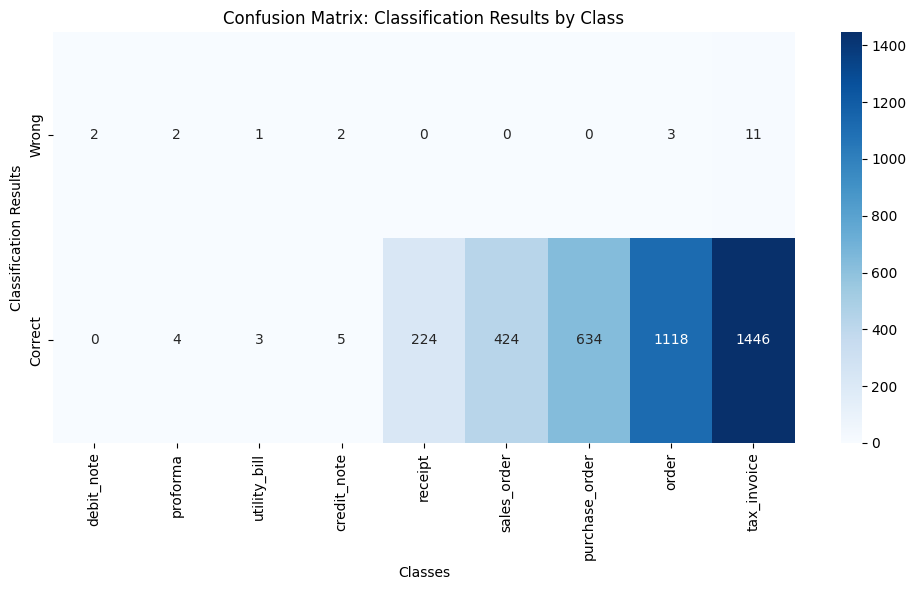

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define categories and data
categories = [
    "debit_note",
    "proforma",
    "utility_bill",
    "credit_note",
    "receipt",
    "sales_order",
    "purchase_order",
    "order",
    "tax_invoice"
]

# Calculate the confusion matrix
conf_matrix = np.zeros((2, len(categories)))  # Initialize a matrix for wrong (0) and correct (1) classifications

for i, category in enumerate(categories):
    for r, o in zip(real, output_list):
        if r == category and o == category:
            conf_matrix[1, i] += 1  # Correct classification
        elif r == category and o != category:
            conf_matrix[0, i] += 1  # Wrong classification

# Create a confusion matrix heatmap using Seaborn with switched axes
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=categories, yticklabels=['Wrong', 'Correct'])
plt.xlabel('Classes')
plt.ylabel('Classification Results')
plt.title('Confusion Matrix: Classification Results by Class')
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/confusion_matrix_2_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()


## calculate metrics

In [106]:
from sklearn.metrics import accuracy_score

# Example predicted and real labels (replace with your actual data)
predicted_labels = output_list
real_labels = real

class_accuracies = []
for class_label in categories:
    class_indices = [i for i, label in enumerate(real_labels) if label == class_label]
    class_predicted = [predicted_labels[i] for i in class_indices]
    class_real = [real_labels[i] for i in class_indices]
    class_accuracy = accuracy_score(class_real, class_predicted)
    class_accuracies.append(class_accuracy)

# Print accuracy for each class
for class_label, class_accuracy in zip(categories, class_accuracies):
    print(f"Accuracy for Class {class_label}: {class_accuracy:.3f}")

Accuracy for Class debit_note: 0.000
Accuracy for Class proforma: 0.667
Accuracy for Class utility_bill: 0.750
Accuracy for Class credit_note: 0.714
Accuracy for Class receipt: 1.000
Accuracy for Class sales_order: 1.000
Accuracy for Class purchase_order: 1.000
Accuracy for Class order: 0.997
Accuracy for Class tax_invoice: 0.992


In [107]:
print(class_accuracies)

[0.0, 0.6666666666666666, 0.75, 0.7142857142857143, 1.0, 1.0, 1.0, 0.9973238180196253, 0.9924502402196294]


In [108]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(real, output_list)

# Calculate F1 score for each class
f1_scores = f1_score(real, output_list, average=None)

# Calculate recall for each class
recall_scores = recall_score(real, output_list, average=None)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")

# Print F1 score and recall for each class
for class_idx, (f1, recall) in enumerate(zip(f1_scores, recall_scores)):
    print(f"Class {class_idx}:")
    print(f"F1 Score: {f1:.3f}")
    print(f"Recall: {recall:.3f}")



Accuracy: 0.99
Class 0:
F1 Score: 0.833
Recall: 0.714
Class 1:
F1 Score: 0.000
Recall: 0.000
Class 2:
F1 Score: 0.996
Recall: 0.997
Class 3:
F1 Score: 0.800
Recall: 0.667
Class 4:
F1 Score: 1.000
Recall: 1.000
Class 5:
F1 Score: 0.998
Recall: 1.000
Class 6:
F1 Score: 0.993
Recall: 1.000
Class 7:
F1 Score: 0.993
Recall: 0.992
Class 8:
F1 Score: 0.857
Recall: 0.750


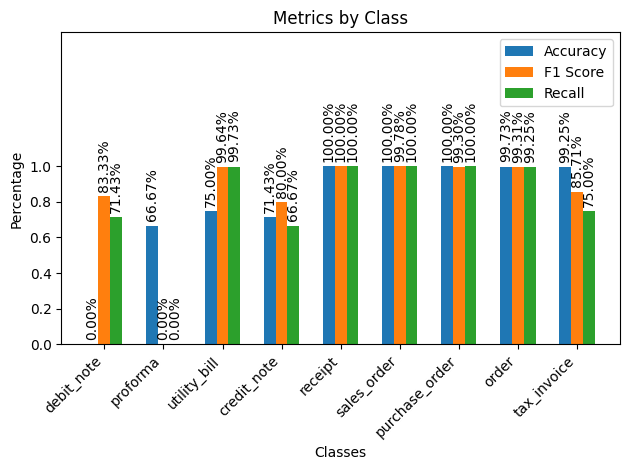

In [109]:
import numpy as np
import matplotlib.pyplot as plt



# values for accuracy, F1 score, and recall for each class
accuracy_values = class_accuracies
f1_score_values = f1_scores
recall_values = recall_scores

# Set the width of the bars
bar_width = 0.2

# Calculate the x-axis positions for each class
x = np.arange(len(categories))

# Create subplots for accuracy, F1 score, and recall
fig, ax = plt.subplots()

# Create bars for each metric
bar_accuracy = ax.bar(x - bar_width, accuracy_values, width=bar_width, label='Accuracy')
bar_f1_score = ax.bar(x, f1_score_values, width=bar_width, label='F1 Score')
bar_recall = ax.bar(x + bar_width, recall_values, width=bar_width, label='Recall')

y_ticks = np.arange(0, 1.1, 0.2)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{tick:.1f}" for tick in y_ticks])

# Set the labels for x-axis and y-axis
ax.set_xlabel('Classes')
ax.set_ylabel('Percentage')
ax.set_title('Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")
ax.legend()

# Display percentages on top of the bars turned by 90 degrees
for bars in [bar_accuracy, bar_f1_score, bar_recall]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2%}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom', rotation=90)
# Set the y-axis limit to 110
ax.set_ylim(0, 1.75)
# Show the plot
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Plots/ImageClassification/Donut/metrics_' + str(epochs) + 'epochs_' + str(mod_tax) + '_' + str(mod_order) + '.png')
plt.show()
